In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
covidsn = pd.read_csv("covid19-sn-april-2020.csv")

In [3]:
covidsn.tail()

,date,test_realized,imported_cases,contact_cases,community_cases,healed,deceaded,under_treatment
25,2020-04-26,579,1,47,9,7,1,380
26,2020-04-27,677,0,50,14,1,0,442
27,2020-04-28,873,0,86,1,12,0,517
28,2020-04-29,800,0,51,8,19,0,557
29,2020-04-30,1161,0,40,11,19,0,589


In [4]:
covidsn["positiverate"] = (covidsn.imported_cases + covidsn.community_cases + covidsn.contact_cases) * 100 / covidsn.test_realized

In [5]:
covidsn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
date               30 non-null object
test_realized      30 non-null int64
imported_cases     30 non-null int64
contact_cases      30 non-null int64
community_cases    30 non-null int64
healed             30 non-null int64
deceaded           30 non-null int64
under_treatment    30 non-null int64
positiverate       30 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 2.2+ KB


In [6]:
covidsn.keys()

Index(['date', 'test_realized', 'imported_cases', 'contact_cases',
       'community_cases', 'healed', 'deceaded', 'under_treatment',
       'positiverate'],
      dtype='object')

In [7]:
covidsn.describe()

,test_realized,imported_cases,contact_cases,community_cases,healed,deceaded,under_treatment,positiverate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,352.300000,0.400000,21.600000,3.300000,9.800000,0.266667,208.600000,6.489108
std,269.531413,1.328728,22.366231,3.621297,4.802298,0.449776,142.898228,2.720434
min,92.000000,0.000000,1.000000,0.000000,1.000000,0.000000,106.000000,1.923077
25%,158.000000,0.000000,5.250000,1.000000,6.250000,0.000000,128.250000,4.005387
50%,249.500000,0.000000,13.000000,2.000000,10.000000,0.000000,138.500000,6.693795
75%,478.000000,0.000000,32.750000,5.000000,13.000000,0.750000,206.750000,7.805430
max,1161.000000,7.000000,86.000000,14.000000,19.000000,1.000000,589.000000,12.500000


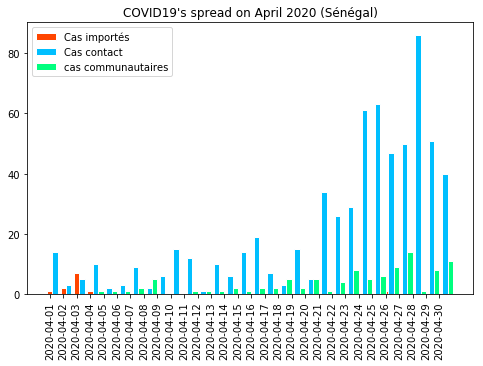

In [8]:
fig = plt.figure()
ypos = np.arange(len(covidsn["date"]))
plt.bar(ypos,covidsn["imported_cases"], width=0.4, edgecolor="white", label="Cas importés", color="orangered")
plt.bar(ypos+0.4,covidsn["contact_cases"], width=0.4, edgecolor="white", label="Cas contact", color="deepskyblue")
plt.bar(ypos+0.8,covidsn["community_cases"], width=0.4, edgecolor="white", label="cas communautaires", color="springgreen")
plt.xticks(ypos, covidsn["date"], rotation=90)
fig.set_size_inches(8,5)
plt.title("COVID19's spread on April 2020 (Sénégal)")
plt.legend()
plt.show()

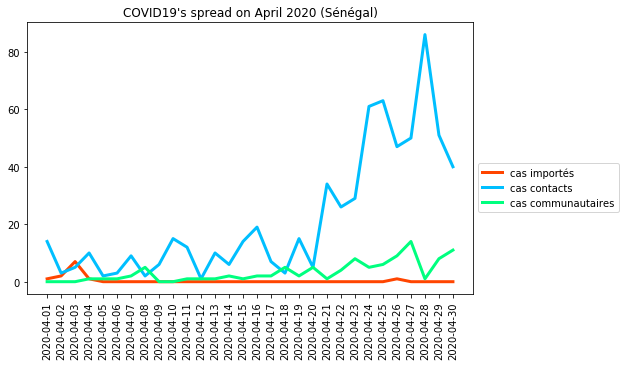

In [9]:
fig = plt.figure()
plt.plot(covidsn["date"],covidsn["imported_cases"], label="cas importés", linewidth=3, color="orangered")
plt.plot(covidsn["date"],covidsn["contact_cases"], label="cas contacts", linewidth=3, color="deepskyblue")
plt.plot(covidsn["date"],covidsn["community_cases"], label="cas communautaires", linewidth=3, color="springgreen")
plt.title("COVID19's spread on April 2020 (Sénégal)")
plt.legend(bbox_to_anchor=(1,0.5))
fig.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

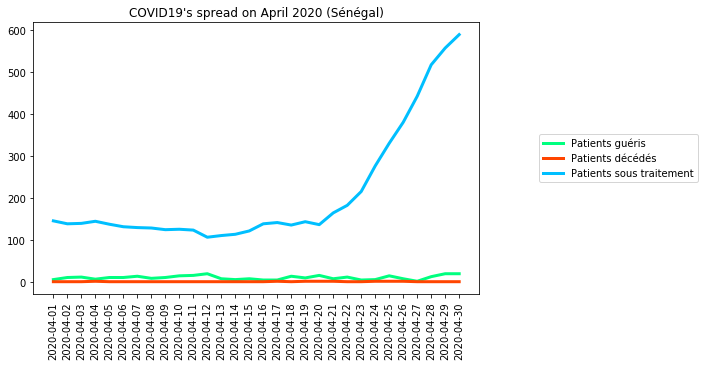

In [10]:
fig = plt.figure()
plt.plot(covidsn["date"],covidsn["healed"], label="Patients guéris", linewidth=3, color = "springgreen")
plt.plot(covidsn["date"],covidsn["deceaded"], label="Patients décédés", linewidth=3, color = "orangered")
plt.plot(covidsn["date"],covidsn["under_treatment"], label="Patients sous traitement", linewidth=3, color="deepskyblue")
plt.legend(loc="right", bbox_to_anchor=(1.5,0.5))
plt.title("COVID19's spread on April 2020 (Sénégal)")
fig.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

In [11]:
sumimported = covidsn["imported_cases"].sum()
sumcontact = covidsn["contact_cases"].sum()
sumcommunity = covidsn["community_cases"].sum()

In [12]:
total = sumimported + sumcontact + sumcommunity

In [13]:
cases = [sumimported, sumcontact, sumcommunity]

In [14]:
percentage = []
for i in cases:
    percentage.append(i*100/total)

In [15]:
percentage

[1.5810276679841897, 85.37549407114625, 13.043478260869565]

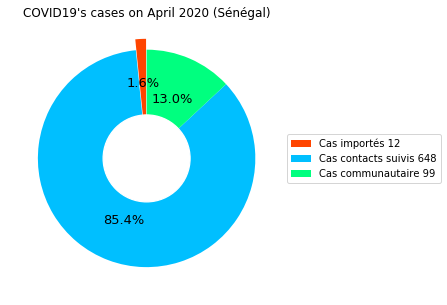

In [16]:
labels=["Cas importés {0}".format(sumimported),"Cas contacts suivis {0}".format(sumcontact),"Cas communautaire {0}".format(sumcommunity)]
colors = ['orangered','deepskyblue','springgreen']
plt.pie(percentage, colors=colors,autopct='%1.1f%%', startangle=90, explode = (0.1,0,0),textprops={'size': '13'})
centre_circle = plt.Circle((0,0),0.40,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(5,5)
plt.legend(labels, loc="right", bbox_to_anchor=(1.6,0.5))
plt.title("COVID19's cases on April 2020 (Sénégal)")
plt.show()

In [17]:
correlation = covidsn.corr()

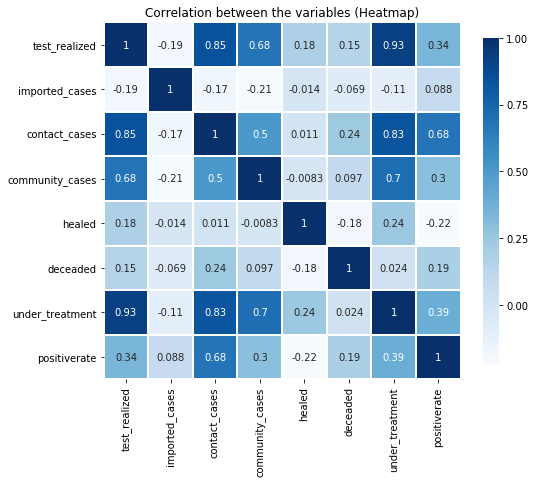

In [18]:
fig = plt.figure()
sns.heatmap(correlation, square=True, annot=True, cmap="Blues", linewidths=1, cbar_kws={"shrink": .75})
plt.title("Correlation between the variables (Heatmap)")
fig.set_size_inches(8,8)
plt.show()

In [19]:
covidsn["positive_test"] = covidsn["imported_cases"] + covidsn["contact_cases"] + covidsn["community_cases"]

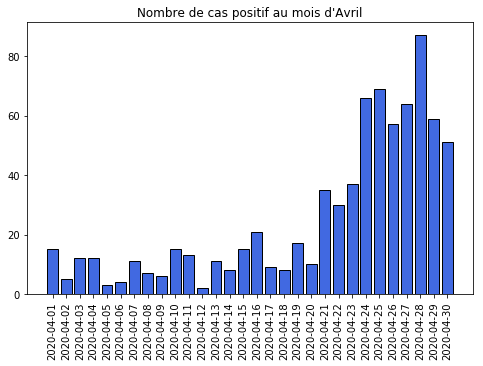

In [20]:
fig = plt.figure()
plt.bar(covidsn["date"], covidsn["positive_test"], color="royalblue", edgecolor="black")
plt.title("Nombre de cas positif au mois d'Avril")
plt.xticks(rotation=90)
fig.set_size_inches(8,5)
plt.show()

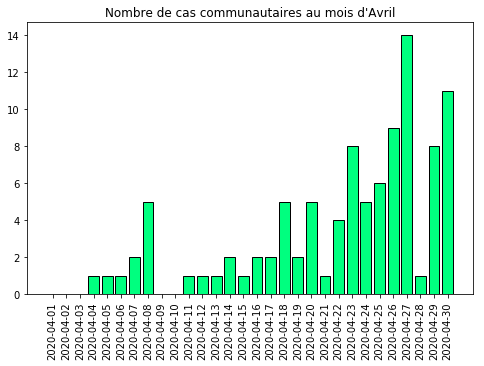

In [21]:
fig = plt.figure()
plt.bar(covidsn["date"], covidsn["community_cases"], color="springgreen", edgecolor="black")
plt.title("Nombre de cas communautaires au mois d'Avril")
plt.xticks(rotation=90)
fig.set_size_inches(8,5)
plt.show()

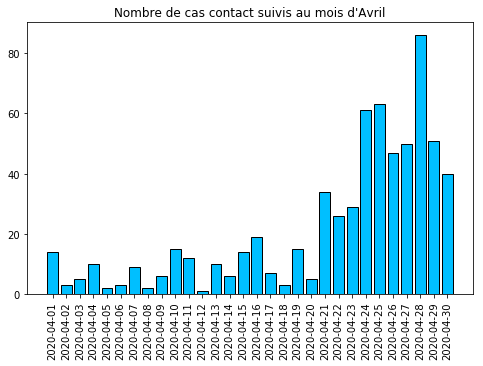

In [22]:
fig = plt.figure()
plt.bar(covidsn["date"], covidsn["contact_cases"], color="deepskyblue", edgecolor="black")
plt.title("Nombre de cas contact suivis au mois d'Avril")
plt.xticks(rotation=90)
fig.set_size_inches(8,5)
plt.show()

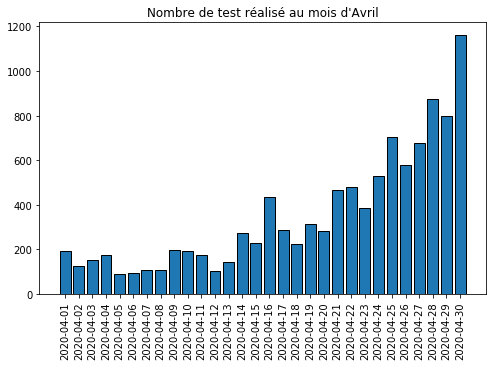

In [23]:
fig = plt.figure()
plt.bar(covidsn.date, covidsn.test_realized, edgecolor="black")
plt.xticks(rotation=90)
plt.title("Nombre de test réalisé au mois d'Avril")
fig.set_size_inches(8,5)
plt.show()

In [24]:
v = covidsn.iloc[:,np.r_[2,3:6]]

In [25]:
deceaded = covidsn.deceaded.sum()

In [26]:
deceaded

8

In [27]:
covidsn.tail()

,date,test_realized,imported_cases,contact_cases,community_cases,healed,deceaded,under_treatment,positiverate,positive_test
25,2020-04-26,579,1,47,9,7,1,380,9.844560,57
26,2020-04-27,677,0,50,14,1,0,442,9.453471,64
27,2020-04-28,873,0,86,1,12,0,517,9.965636,87
28,2020-04-29,800,0,51,8,19,0,557,7.375000,59
29,2020-04-30,1161,0,40,11,19,0,589,4.392765,51


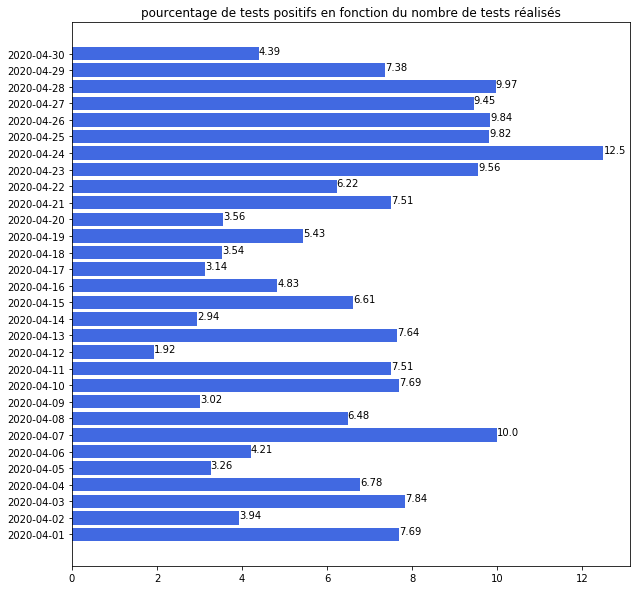

In [28]:
fig = plt.figure()
plt.barh(covidsn.date, covidsn.positiverate, color="royalblue")
plt.title("pourcentage de tests positifs en fonction du nombre de tests réalisés")
fig.set_size_inches(10,10)

for index, value in enumerate(covidsn.positiverate):
    plt.text(value, index, round(value,2))
    
plt.show()

# Principal component Analysis

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [30]:
covidsn_pca = covidsn.iloc[:,1:8]
scaler = StandardScaler()

In [31]:
scaler.fit(covidsn_pca)

C:\Users\mathiam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
scaled_data = scaler.transform(covidsn_pca)

C:\Users\mathiam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [33]:
#print(scaled_data)
pca = PCA()

In [34]:
xpca = pca.fit_transform(scaled_data)

In [35]:
scaled_data.shape

(30, 7)

In [36]:
xpca.shape

(30, 7)

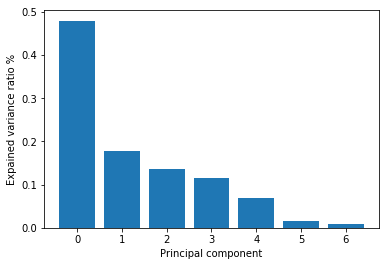

In [37]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal component")
plt.ylabel("Expained variance ratio %")
plt.show()

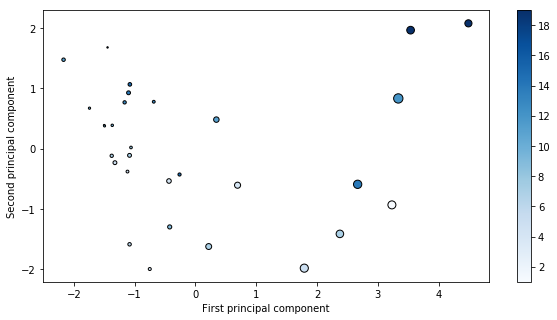

In [61]:
fig = plt.figure()
plt.scatter(xpca[:,0],xpca[:,1], c= covidsn["healed"], s= covidsn["positive_test"], cmap='Blues', edgecolors='k')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()
fig.set_size_inches(10,5)
plt.show()

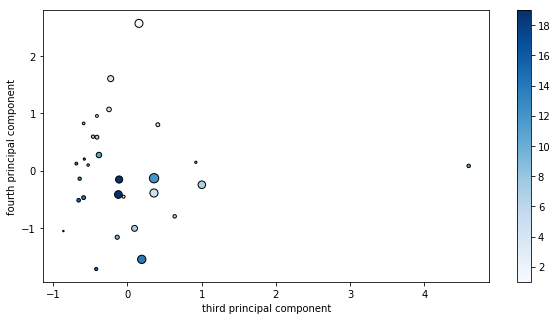

In [62]:
fig = plt.figure()
plt.scatter(xpca[:,2],xpca[:,3], c= covidsn["healed"], s= covidsn["positive_test"], cmap='Blues', edgecolors='k')
plt.xlabel("third principal component")
plt.ylabel("fourth principal component")
plt.colorbar()
fig.set_size_inches(10,5)
plt.show()